In [98]:
                            # EDA-1
# 1.What is the range of selling prices in the datasetD?

import pandas as pd
df = pd.read_csv('BIKE DETAILS.csv')
df.columns
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
selling_price_range

np.int64(755000)

In [19]:
# 2.What is the median selling price for bikes in the datasetD


median_selling_price = df['selling_price'].median()
median_selling_price

np.float64(45000.0)

In [10]:
# 3.What is the most common seller type?

most_common_seller_type = df['seller_type'].value_counts().idxmax()
most_common_seller_type

'Individual'

In [12]:
# 4.How many bikes have driven more than 50,000 kilometers

high_mileage_bikes = df[df['km_driven'] > 50000]
high_mileage_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
15,Suzuki Access 125 [2007-2016],25000,2012,Individual,1st owner,55000,58314.0
20,Hero Passion Pro 110,15000,2008,Individual,1st owner,60000,NaN
31,Yamaha FZ S [2012-2016],38000,2013,Individual,1st owner,75000,79432.0
43,Hero Passion XPro,28000,2012,Individual,1st owner,81000,56750.0
...,...,...,...,...,...,...,...
1049,Hero Super Splendor,20000,2007,Individual,1st owner,55000,57000.0
1050,Bajaj Pulsar 150,20000,2010,Individual,1st owner,60000,75000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [13]:
# 5.What is the average km_driven value for each ownership type?

average_km_by_ownership = df.groupby('owner')['km_driven'].mean()
average_km_by_ownership

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [15]:
# 6.What proportion of bikes are from the year 2015 or older

total_bikes = len(df)
bikes_2015_or_older = df[df['year'] <= 2015]
count_2015_or_older = len(bikes_2015_or_older)
proportion = count_2015_or_older / total_bikes
print(proportion)

0.5664467483506126


In [17]:
# 7.What is the trend of missing values across the dataset?

missing_values = df.isnull().sum()
missing_values

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [20]:
# 8.What is the highest ex_showroom_price recorded, and for which bike?

highest_price_row = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
highest_price_row[['name', 'ex_showroom_price']]

,name,ex_showroom_price
134,Harley-Davidson Street Bob,1278000.0


In [21]:
# 9.What is the total number of bikes listed by each seller type?

bikes_per_seller_type = df['seller_type'].value_counts()
bikes_per_seller_type

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

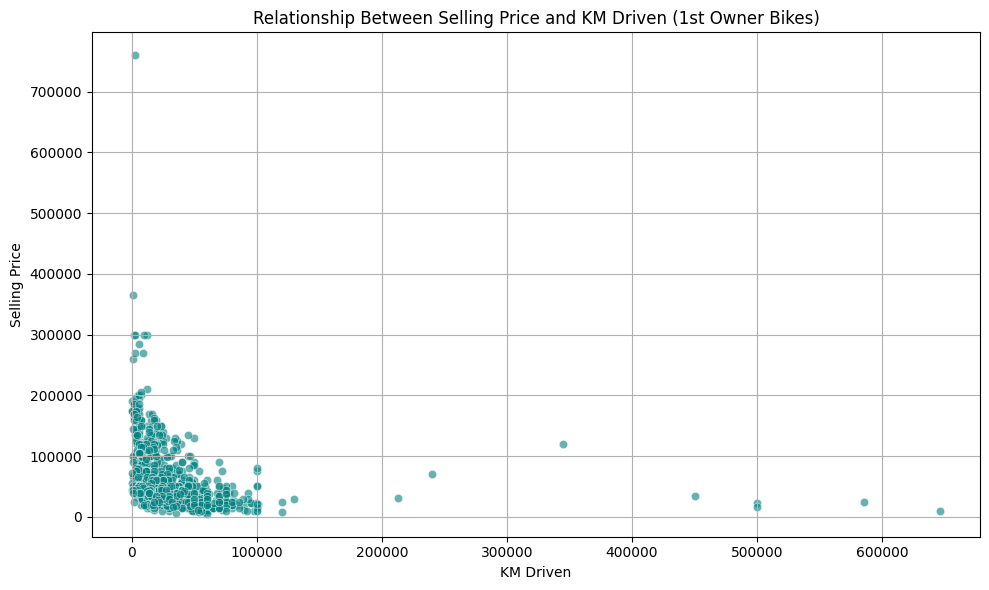

In [100]:
# 10.What is the relationship between selling_price and km_driven for first-owner bikes?

import matplotlib.pyplot as plt
bike_df = pd.read_csv("BIKE DETAILS.csv")

first_owner_bikes = bike_df[bike_df['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price', alpha=0.6, color='teal')
plt.title('Relationship Between Selling Price and KM Driven (1st Owner Bikes)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# 11.Identify and remove outliers in the km_driven column using the IQR method


Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("Original rows:", len(df))
print("After removing outliers:", len(df_no_outliers))

Original rows: 1061
After removing outliers: 1022


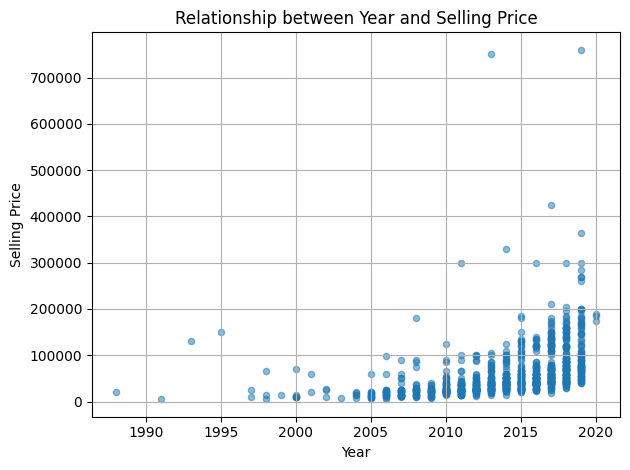

In [29]:
# 12.Perform a bivariate analysis to visualize the relationship between year and selling_price

df = df.dropna(subset=['year', 'selling_price'])
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df = df.dropna(subset=['year', 'selling_price'])
df.plot.scatter(x='year', y='selling_price', alpha=0.5)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# 13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2025
df['age'] = current_year - df['year']
df[['year', 'age', 'selling_price']].head()

,year,age,selling_price
0,2019,6,175000
1,2017,8,45000
2,2018,7,150000
3,2015,10,65000
4,2011,14,20000


In [32]:
# 14.Which bike names are priced significantly above the average price for their manufacturing year?

filtered = df.dropna(subset=['year', 'selling_price'])
filtered['year'] = pd.to_numeric(filtered['year'], errors='coerce')
filtered['selling_price'] = pd.to_numeric(filtered['selling_price'], errors='coerce')
avg_price_by_year = filtered.groupby('year')['selling_price'].mean()
avg_price_by_year.head(10) # Preview

year
1988     20000.000000
1991      6000.000000
1993    130000.000000
1995    150000.000000
1997     17500.000000
1998     28333.333333
1999     15000.000000
2000     20833.333333
2001     40000.000000
2002     20666.666667
Name: selling_price, dtype: float64

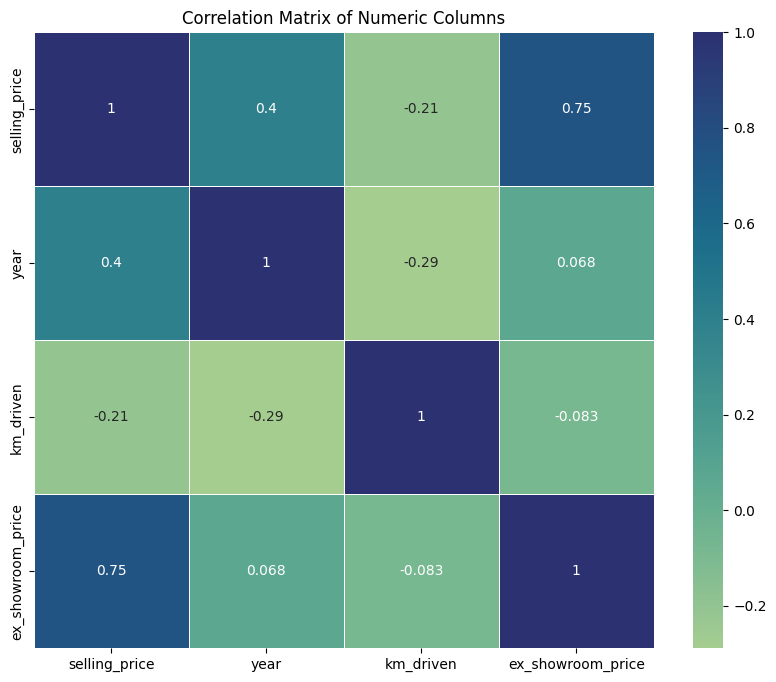

In [46]:



import matplotlib.pyplot as plt
import seaborn as sns
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].mean())
df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')
df.dropna(subset=['ex_showroom_price'], inplace=True)
numeric_df = df[['selling_price', 'year', 'km_driven', 'ex_showroom_price']]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


In [47]:
# 1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

import pandas as pd
df = pd.read_csv('Car Sale.csv')
average_prices = df.groupby('Dealer_Name')['Price ($)'].mean()
print("Average Selling Price by Dealer:")
print(average_prices)
print("\nComparison of Average Selling Prices Across Dealers:")
print(average_prices.describe())

Average Selling Price by Dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.88

In [48]:
# 2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

price_variance = df.groupby('Company')['Price ($)'].var()
company_highest_variance = price_variance.idxmax()
highest_variance_value = price_variance.max()
print(f"Company with the highest price variance: {company_highest_variance}")
print(f"Variance value: {highest_variance_value}")
print(f"\nPrice statistics for {company_highest_variance}:")
print(df[df['Company'] == company_highest_variance]['Price ($)'].describe())
comparison_company = 'Ford'
print(f"\nPrice statistics for {comparison_company}:")
print(df[df['Company'] == comparison_company]['Price ($)'].describe())


Company with the highest price variance: Lincoln
Variance value: 386438938.10863817

Price statistics for Lincoln:
count      492.000000
mean     31407.036585
std      19658.050211
min       1700.000000
25%      18001.000000
50%      26000.000000
75%      33001.000000
max      82500.000000
Name: Price ($), dtype: float64

Price statistics for Ford:
count     1614.000000
mean     29263.682156
std      15849.090227
min       1200.000000
25%      18000.000000
50%      22225.500000
75%      41001.000000
max      69600.000000
Name: Price ($), dtype: float64


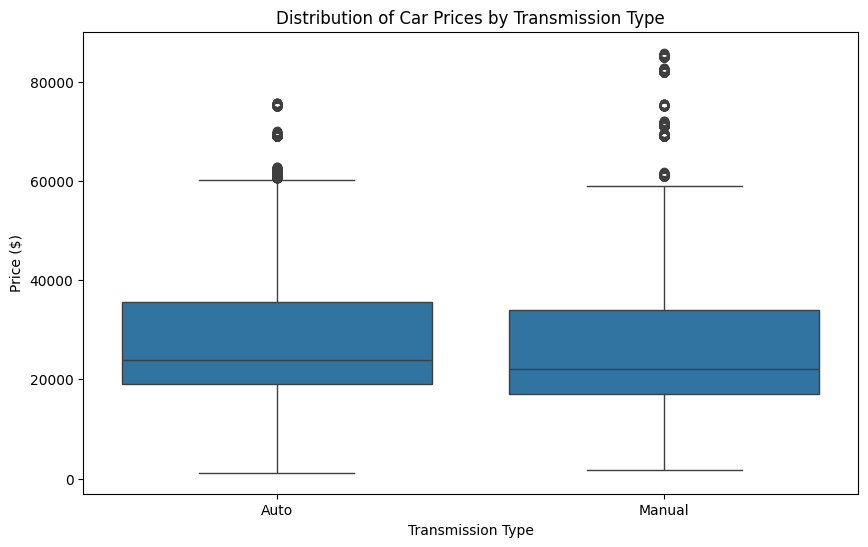

In [49]:
# 3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

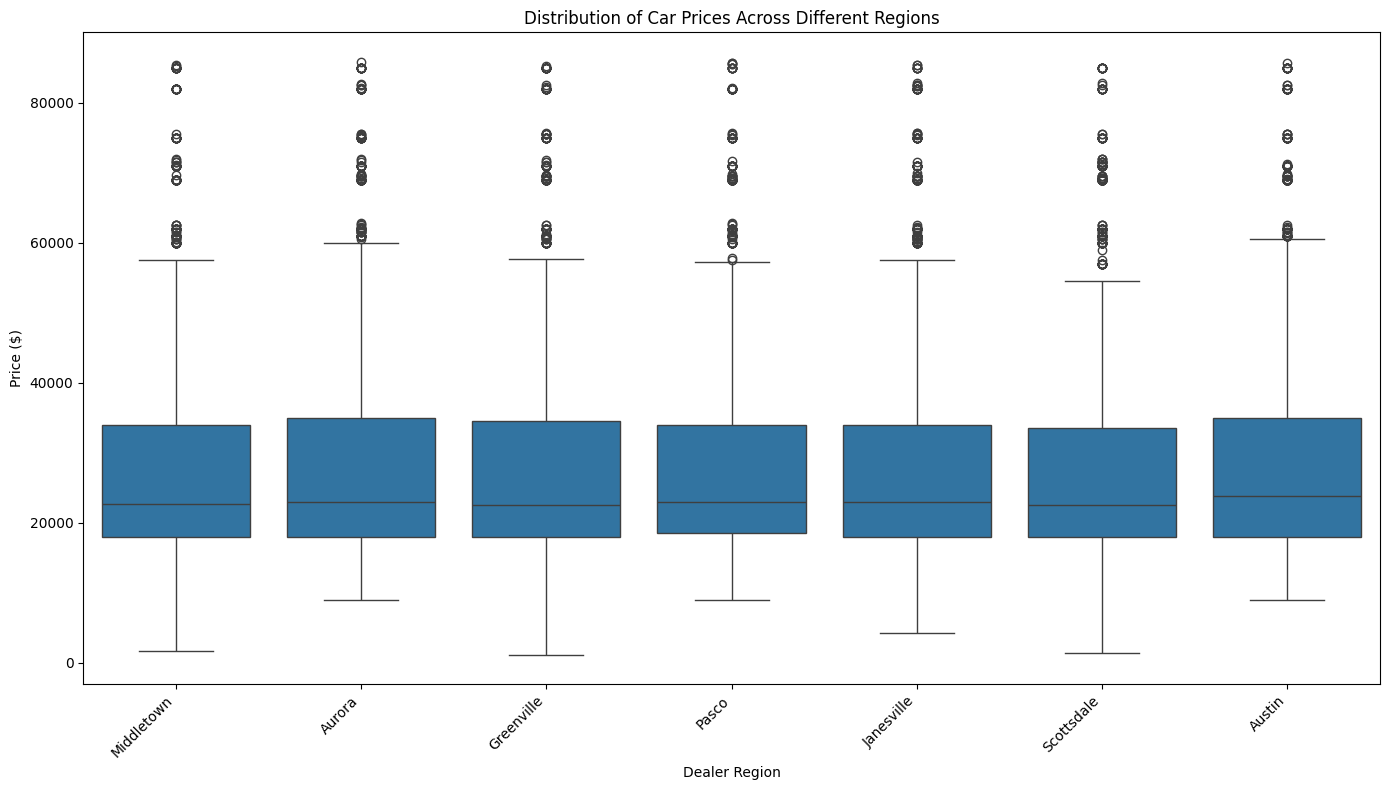

In [50]:
# 4.What is the distribution of car prices across different regions?

plt.figure(figsize=(14, 8))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

C:\Users\srava\AppData\Local\Temp\ipykernel_17764\1865036918.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='viridis')


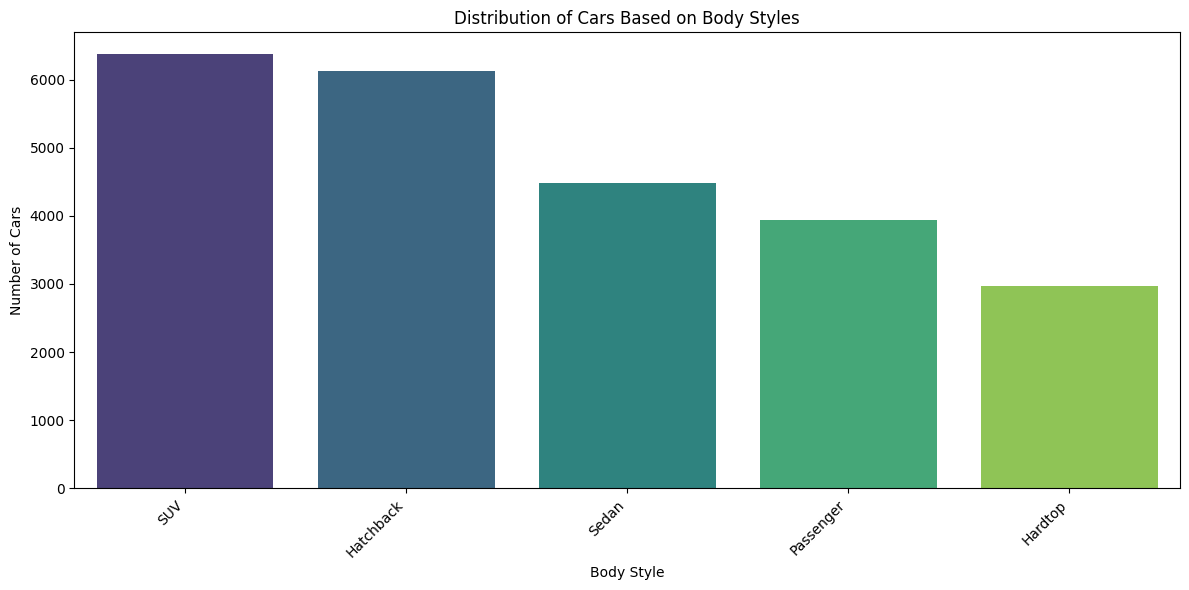

In [52]:
# 5.What is the distribution of cars based on body styles?

body_style_counts = df['Body Style'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='viridis')
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


C:\Users\srava\AppData\Local\Temp\ipykernel_17764\936005097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_avg_price.index, y=gender_avg_price.values, palette='viridis')


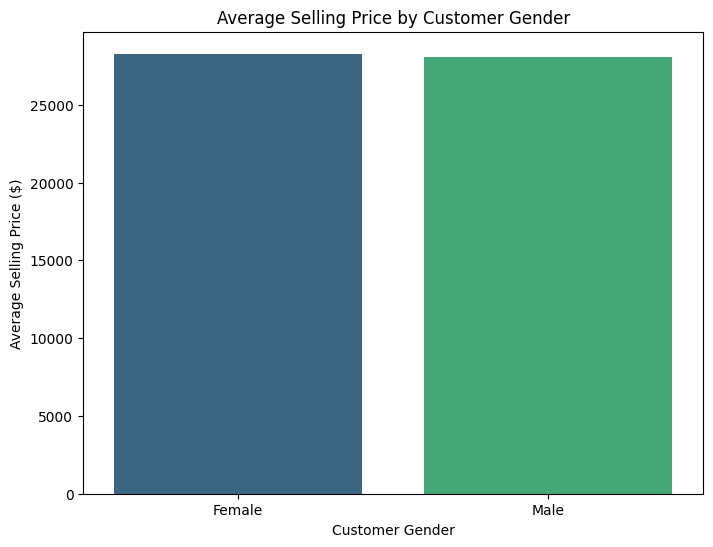

C:\Users\srava\AppData\Local\Temp\ipykernel_17764\936005097.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_avg_price = df.groupby('Income Bracket')['Price ($)'].mean()
C:\Users\srava\AppData\Local\Temp\ipykernel_17764\936005097.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_avg_price.index, y=income_avg_price.values, palette='magma')



Average Selling Price by Income Bracket:
Income Bracket
<500K      28086.588267
500K-1M    28011.726423
1M-1.5M    28196.078886
1.5M-2M    27609.611492
>2M        28970.111857
Name: Price ($), dtype: float64


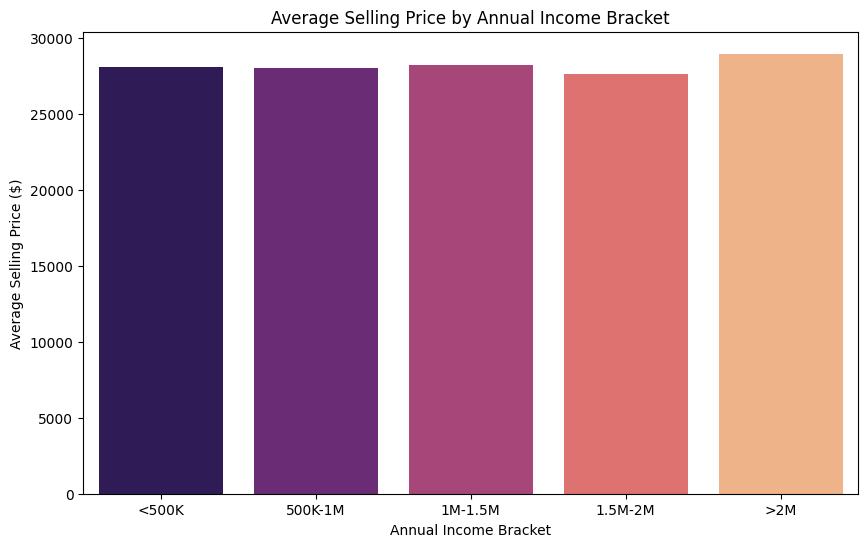

C:\Users\srava\AppData\Local\Temp\ipykernel_17764\936005097.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_income_avg_price = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().unstack()



Average Selling Price by Gender and Income Bracket:
Income Bracket         <500K       500K-1M       1M-1.5M       1.5M-2M  \
Gender                                                                   
Female          28303.975666  28070.242135  28813.466234  27612.676768   
Male            28021.413583  27993.611332  28061.788418  27609.042500   

Income Bracket           >2M  
Gender                        
Female          29073.304147  
Male            28950.189502  


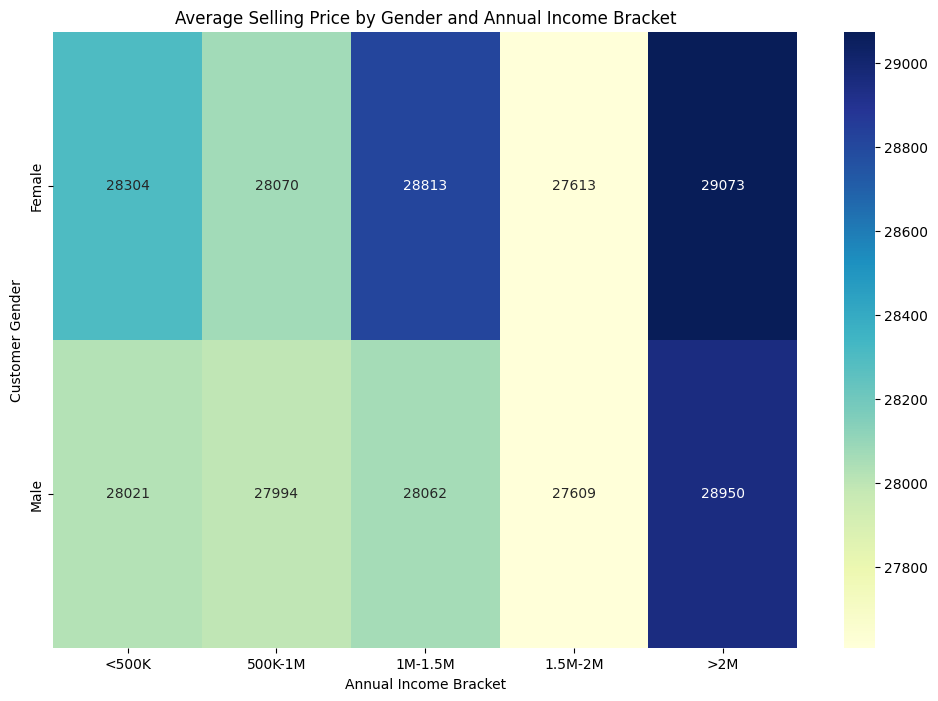

In [54]:
# 6.How does the average selling price of cars vary by customer gender and annual income?

gender_avg_price = df.groupby('Gender')['Price ($)'].mean()
print(gender_avg_price)

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_avg_price.index, y=gender_avg_price.values, palette='viridis')
plt.title('Average Selling Price by Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Average Selling Price ($)')
plt.show()

income_brackets = [0, 500000, 1000000, 1500000, 2000000, df['Annual Income'].max()]
income_labels = ['<500K', '500K-1M', '1M-1.5M', '1.5M-2M', '>2M']

df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_brackets, labels=income_labels)

income_avg_price = df.groupby('Income Bracket')['Price ($)'].mean()

print("\nAverage Selling Price by Income Bracket:")
print(income_avg_price)

plt.figure(figsize=(10, 6))
sns.barplot(x=income_avg_price.index, y=income_avg_price.values, palette='magma')
plt.title('Average Selling Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Selling Price ($)')
plt.show()

gender_income_avg_price = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().unstack()

print("\nAverage Selling Price by Gender and Income Bracket:")
print(gender_income_avg_price)

plt.figure(figsize=(12, 8))
sns.heatmap(gender_income_avg_price, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title('Average Selling Price by Gender and Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Customer Gender')
plt.show()

C:\Users\srava\AppData\Local\Temp\ipykernel_17764\2857711203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, palette='viridis')


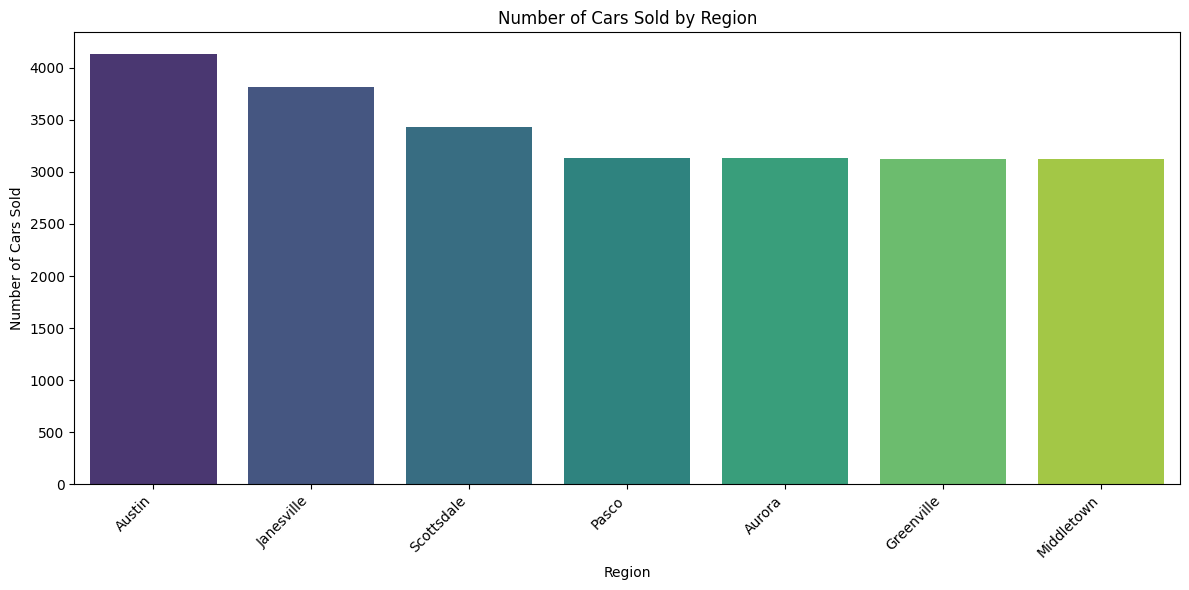

In [55]:
# 7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?

cars_sold_by_region = df['Dealer_Region'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, palette='viridis')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Average Car Price by Engine Type:
Engine
Double Overhead Camshaft    28248.525972
Overhead Camshaft           27914.710631
Name: Price ($), dtype: float64


C:\Users\srava\AppData\Local\Temp\ipykernel_17764\458219180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engine_avg_price.index, y=engine_avg_price.values, palette='viridis')


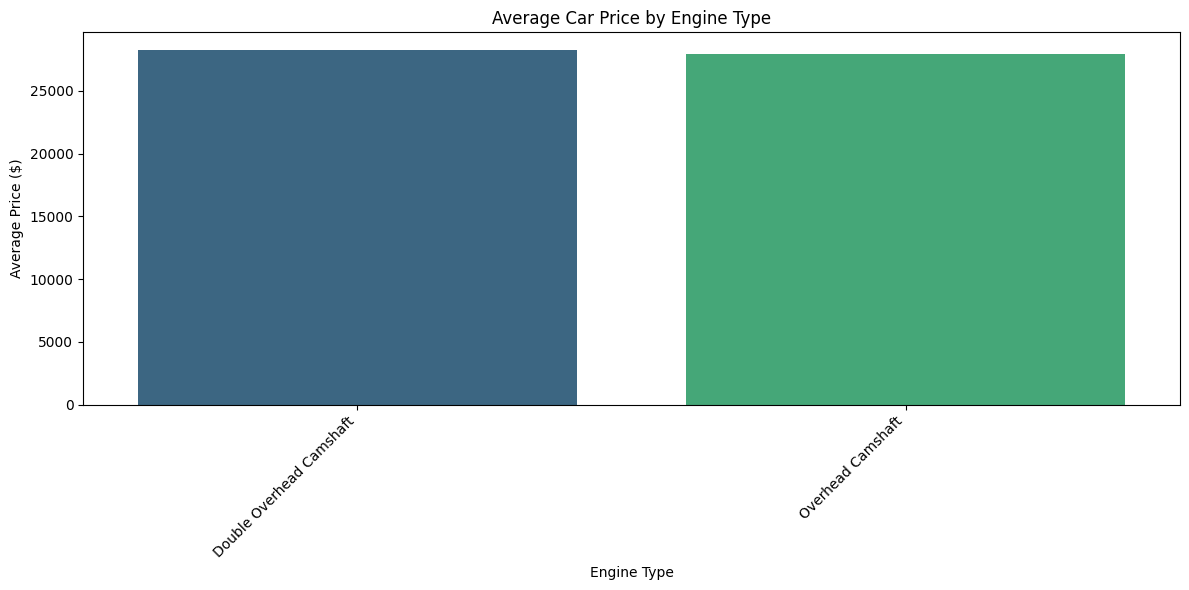

In [56]:
# 8.How does the average car price differ between cars with different engine sizes?

df['Engine'] = df['Engine'].str.replace('Â', '', regex=False)
engine_avg_price = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("Average Car Price by Engine Type:")
print(engine_avg_price)

plt.figure(figsize=(12, 6))
sns.barplot(x=engine_avg_price.index, y=engine_avg_price.values, palette='viridis')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

C:\Users\srava\AppData\Local\Temp\ipykernel_17764\839026854.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_avg_price = df.groupby('Income Bracket')['Price ($)'].mean()
C:\Users\srava\AppData\Local\Temp\ipykernel_17764\839026854.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_avg_price.index, y=income_avg_price.values, palette='magma')


Average Selling Price by Annual Income Bracket:
Income Bracket
<500K      28086.588267
500K-1M    28011.726423
1M-1.5M    28196.078886
1.5M-2M    27609.611492
>2M        28970.111857
Name: Price ($), dtype: float64


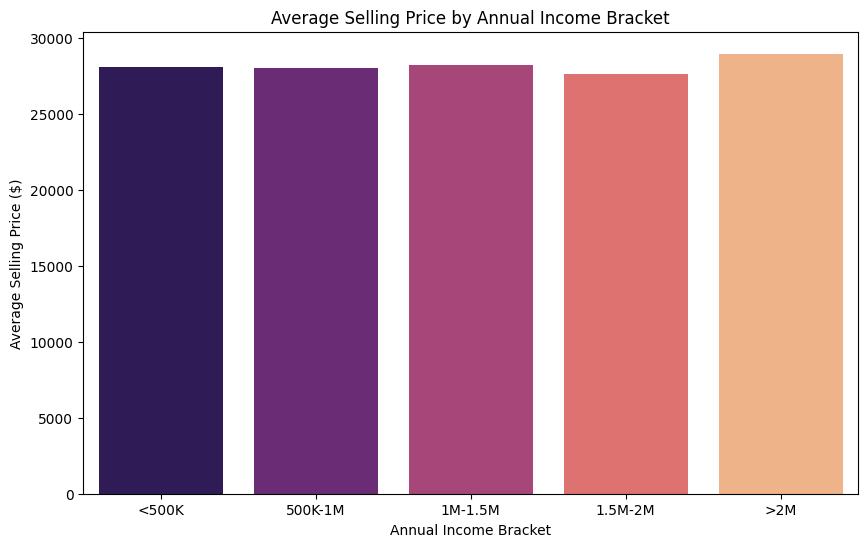

In [57]:
# 9.How do car prices vary based on the customer’s annual income bracket?

income_brackets = [0, 500000, 1000000, 1500000, 2000000, df['Annual Income'].max()]
income_labels = ['<500K', '500K-1M', '1M-1.5M', '1.5M-2M', '>2M']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_brackets, labels=income_labels)

income_avg_price = df.groupby('Income Bracket')['Price ($)'].mean()

print("Average Selling Price by Annual Income Bracket:")
print(income_avg_price)

plt.figure(figsize=(10, 6))
sns.barplot(x=income_avg_price.index, y=income_avg_price.values, palette='magma')
plt.title('Average Selling Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Selling Price ($)')
plt.show()

Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


C:\Users\srava\AppData\Local\Temp\ipykernel_17764\3121025404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Price ($)', data=df_top_5, palette='viridis')


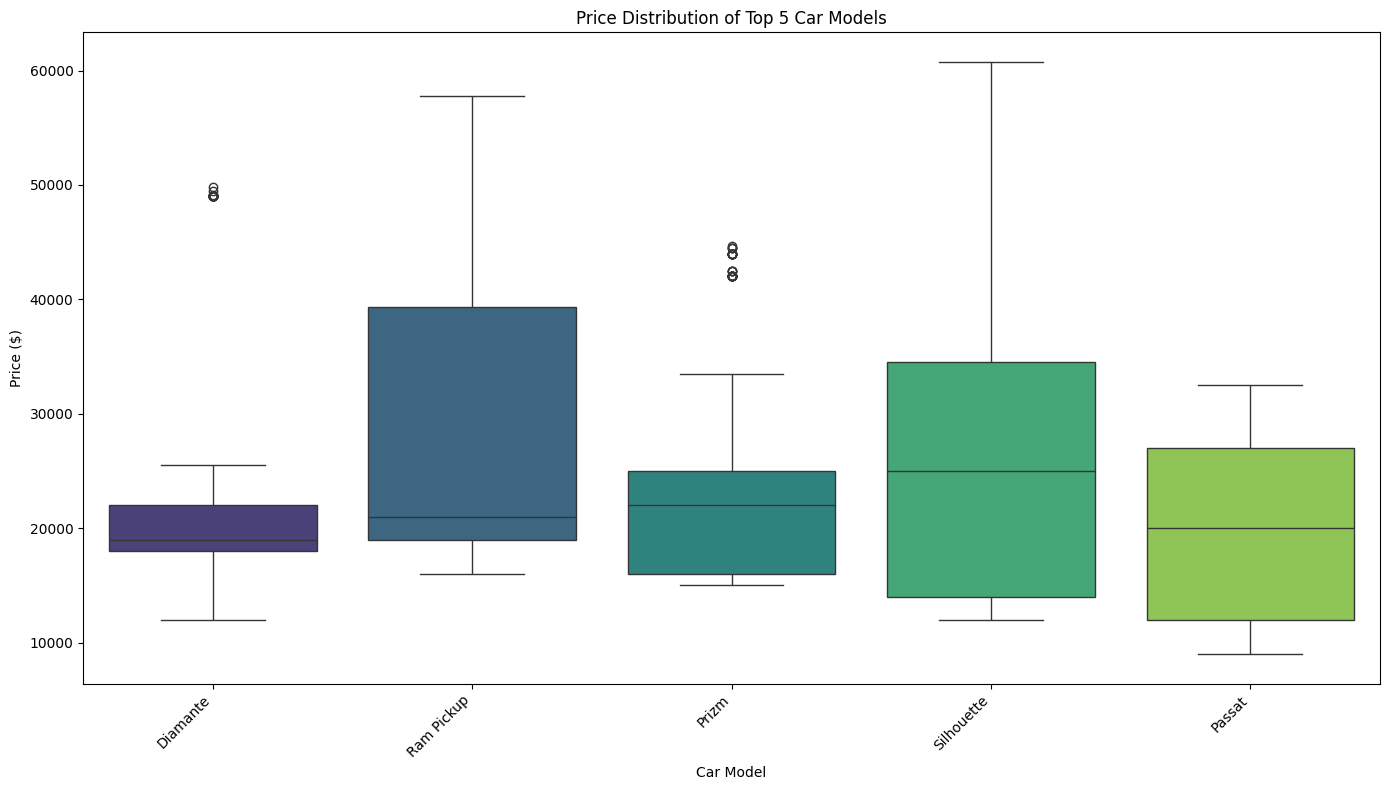

In [61]:
# 10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_5_models = df['Model'].value_counts().nlargest(5)
print(top_5_models)
df_top_5 = df[df['Model'].isin(top_5_models.index)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Price ($)', data=df_top_5, palette='viridis')
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

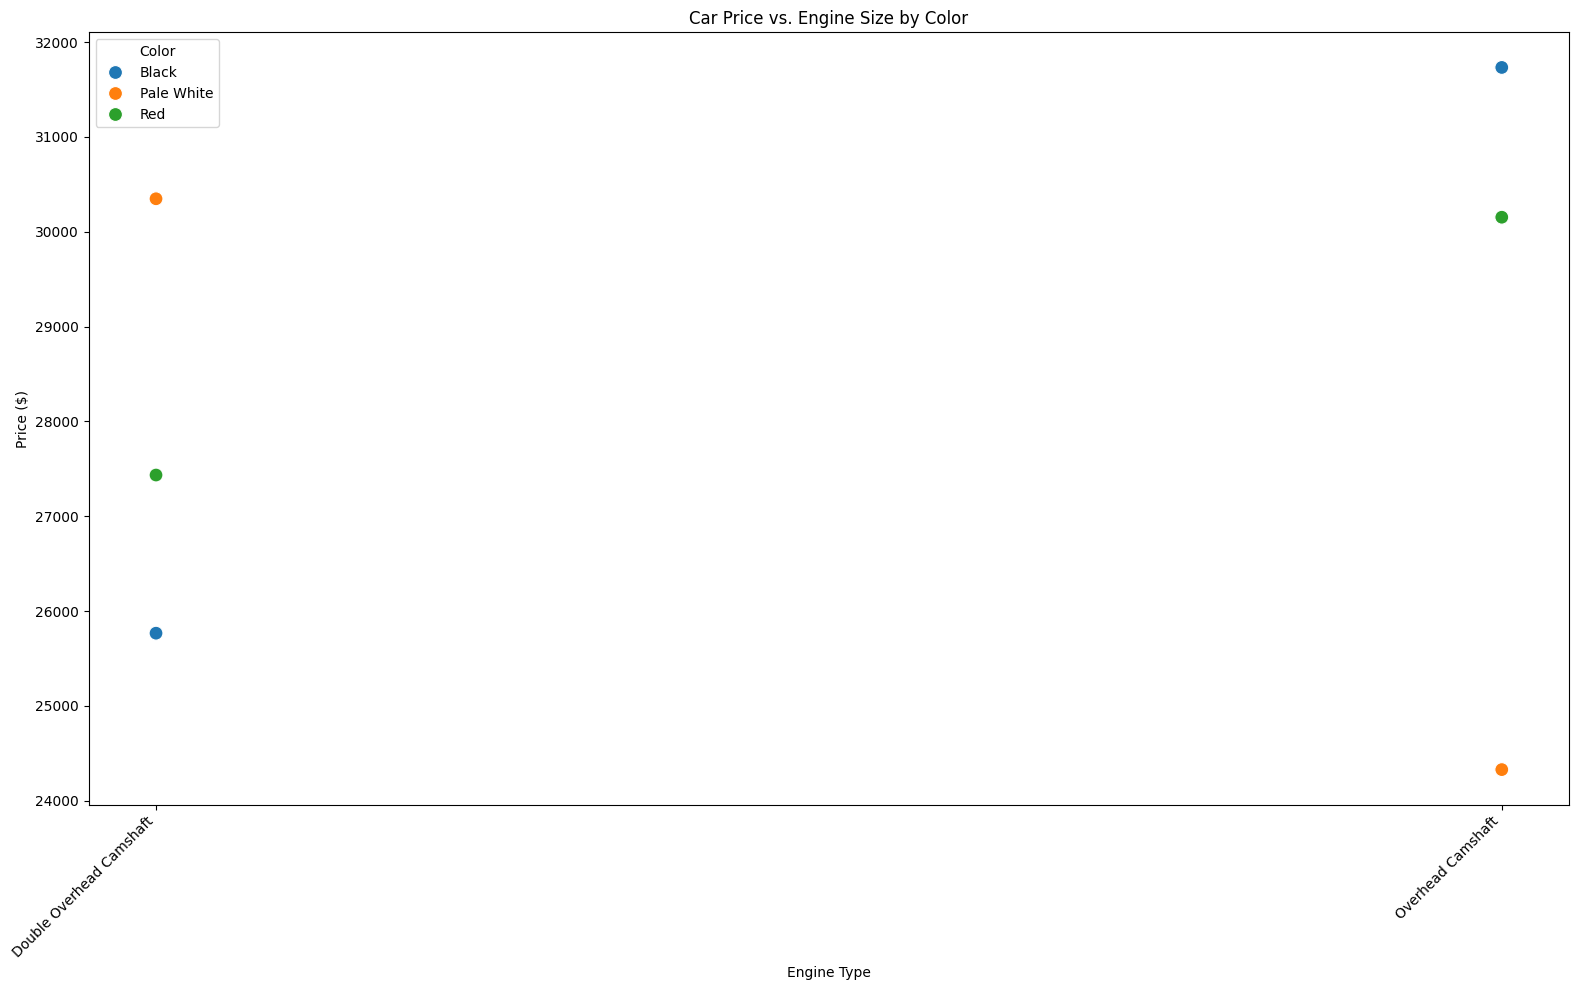


Colors with the Highest Price Variation:
Color
Red           2.408506e+08
Black         2.336638e+08
Pale White    1.981717e+08
Name: Price ($), dtype: float64


In [62]:
# 11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?

df['Engine'] = df['Engine'].str.replace('Â', '', regex=False)

grouped_data = df.groupby(['Color', 'Engine'])['Price ($)'].mean().reset_index()

plt.figure(figsize=(16, 10))
sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=grouped_data, s=100)
plt.title('Car Price vs. Engine Size by Color')
plt.xlabel('Engine Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Color')
plt.show()

color_price_variation = df.groupby('Color')['Price ($)'].var().sort_values(ascending=False)
print("\nColors with the Highest Price Variation:")
print(color_price_variation)

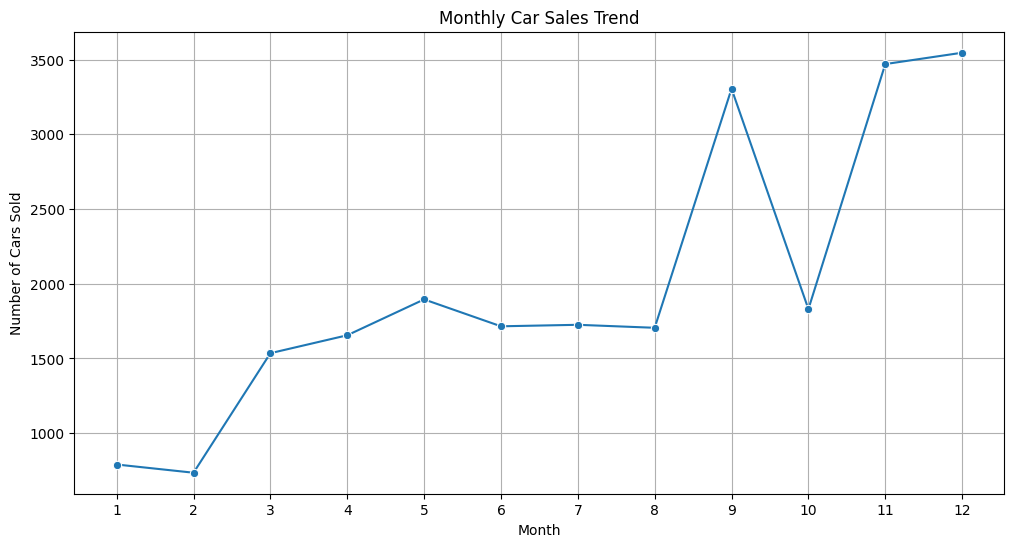

In [63]:
# 12. Is there any seasonal trend in car sales based on the date of sale?

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Month'] = df['Date'].dt.month
monthly_sales = df['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13))  
plt.grid(True)
plt.show()

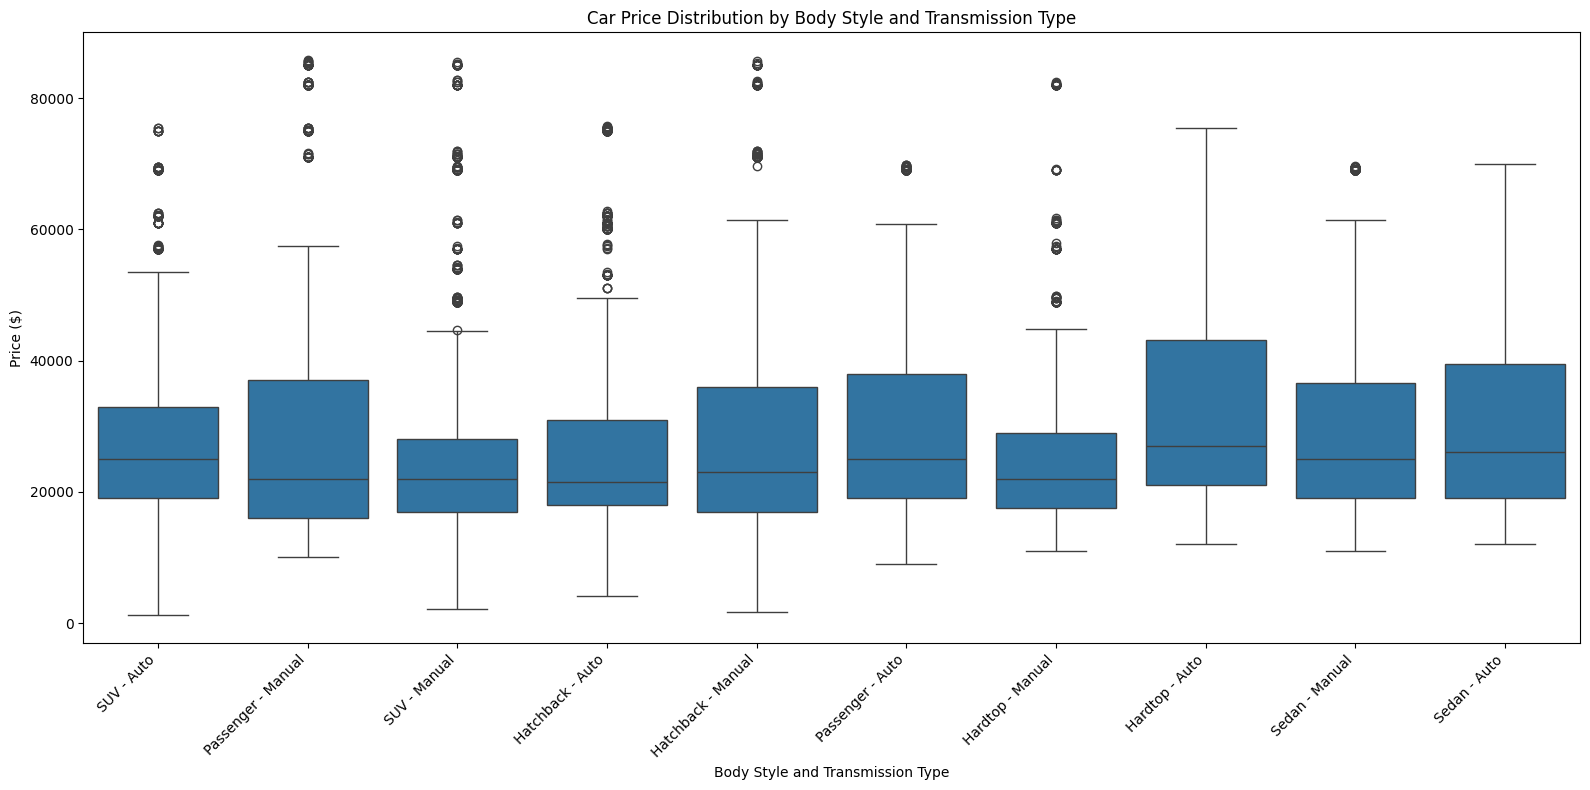

In [64]:
# 13.How does the car price distribution change when considering different combinations of body style and transmission type?

df['Body_Transmission'] = df['Body Style'] + ' - ' + df['Transmission']
plt.figure(figsize=(16, 8))
sns.boxplot(x='Body_Transmission', y='Price ($)', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style and Transmission Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\srava\AppData\Local\Temp\ipykernel_17764\44678901.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['Engine_Size'] = df['Engine'].str.extract('(\d+)').astype(float)


Correlation Matrix:
               Price ($)  Engine_Size  Annual Income
Price ($)       1.000000          NaN       0.012065
Engine_Size          NaN          NaN            NaN
Annual Income   0.012065          NaN       1.000000


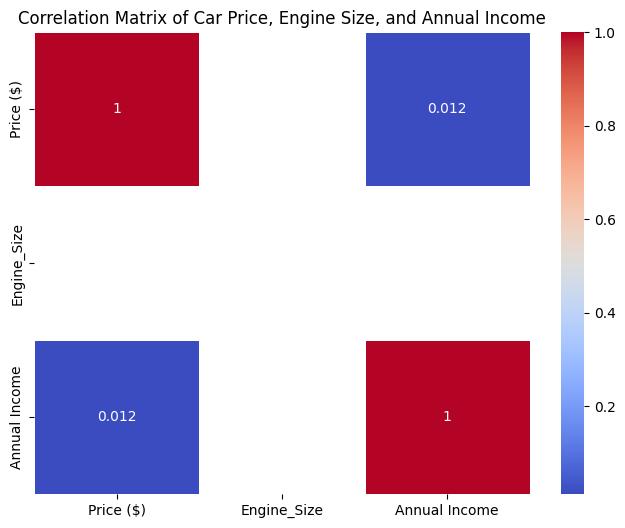

In [70]:
# 14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

df['Engine'] = df['Engine'].str.replace('Â', '', regex=False)

df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')

df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

df = df.dropna(subset=['Engine', 'Price ($)', 'Annual Income'])

df['Engine_Size'] = df['Engine'].str.extract('(\d+)').astype(float)

correlation_matrix = df[['Price ($)', 'Engine_Size', 'Annual Income']].corr()

print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')
plt.show()

Average Car Price by Model and Engine Type:
        Model                    Engine     Price ($)
0       3-Sep  Double Overhead Camshaft  37986.380117
1      3000GT  Double Overhead Camshaft  22764.326923
2      3000GT         Overhead Camshaft  21770.659864
3        300M  Double Overhead Camshaft  21394.888889
4        323i  Double Overhead Camshaft  16744.632287
..        ...                       ...           ...
256  Windstar         Overhead Camshaft  17100.272727
257  Wrangler  Double Overhead Camshaft  21145.294737
258  Wrangler         Overhead Camshaft  18742.942029
259    Xterra  Double Overhead Camshaft  15940.459459
260    Xterra         Overhead Camshaft  31072.500000

[261 rows x 3 columns]


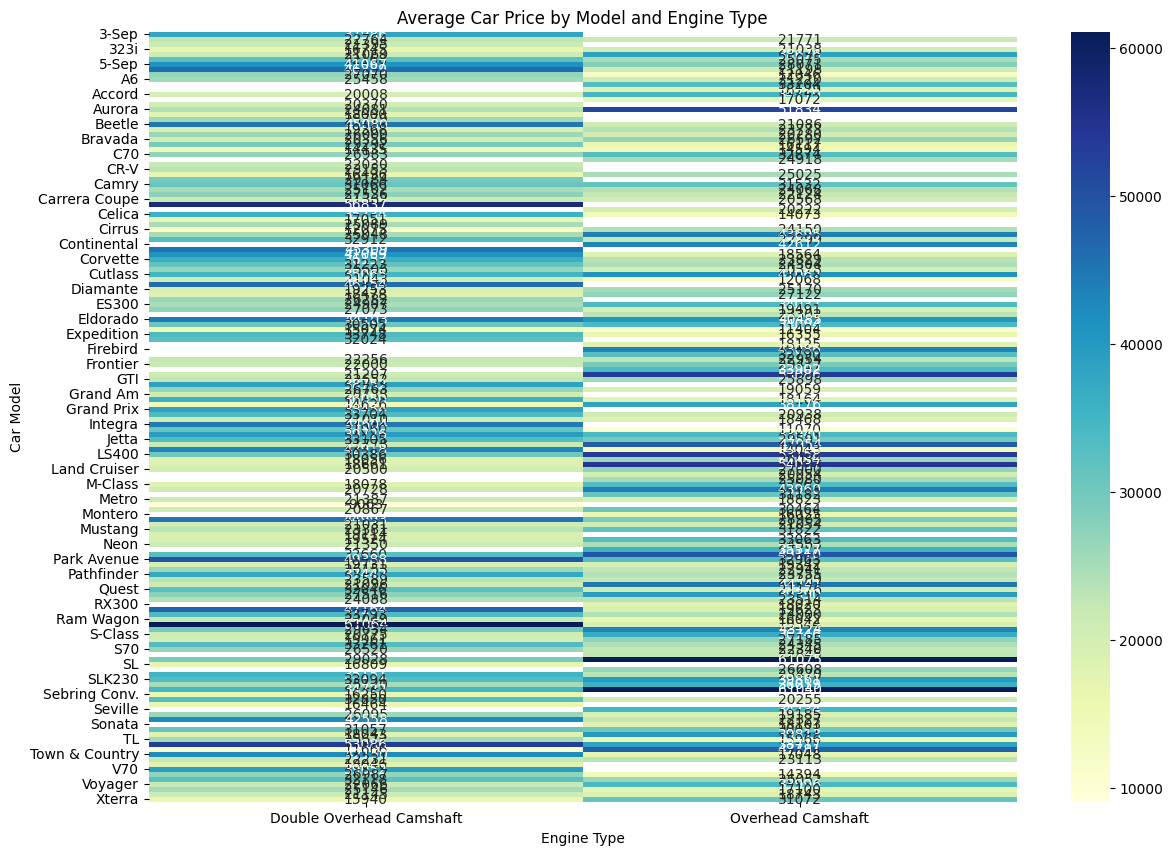

In [71]:
# 15.How does the average car price vary across different car models and engine types?

df['Engine'] = df['Engine'].str.replace('Â', '', regex=False)

model_engine_avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

print("Average Car Price by Model and Engine Type:")
print(model_engine_avg_price)

pivot_table = model_engine_avg_price.pivot(index='Model', columns='Engine', values='Price ($)')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Car Model')
plt.show()

In [72]:
                               # EDA-3
# 1. What is the average rating for each product category?

import pandas as pd

df = pd.read_csv('amazon.csv')
df['top_category'] = df['category'].str.split('|').str[0]
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
average_ratings = df.groupby('top_category')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

average_ratings

,top_category,rating
7,OfficeProducts,4.309677
8,Toys&Games,4.300000
5,HomeImprovement,4.250000
1,Computers&Accessories,4.154967
2,Electronics,4.081749
4,Home&Kitchen,4.040716
3,Health&PersonalCare,4.000000
6,MusicalInstruments,3.900000
0,Car&Motorbike,3.800000


In [73]:
# 2.What are the top rating_count products by category?

df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)
top_rated_products = df.loc[df.groupby('top_category')['rating_count'].idxmax(), ['top_category', 'product_name', 'rating_count', 'rating']]

top_rated_products.sort_values(by='rating_count', ascending=False)


,top_category,product_name,rating_count,rating
12,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0,4.4
1028,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0,4.1
588,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0,4.3
613,MusicalInstruments,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,68664.0,4.0
924,Toys&Games,Faber-Castell Connector Pen Set - Pack of 25 (...,15867.0,4.3
659,OfficeProducts,Casio FX-82MS 2nd Gen Non-Programmable Scienti...,12179.0,4.4
982,HomeImprovement,"Gizga Essentials Cable Organiser, Cord Managem...",5985.0,4.5
1247,Health&PersonalCare,Dr Trust Electronic Kitchen Digital Scale Weig...,3663.0,4.0
1157,Car&Motorbike,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0,3.8


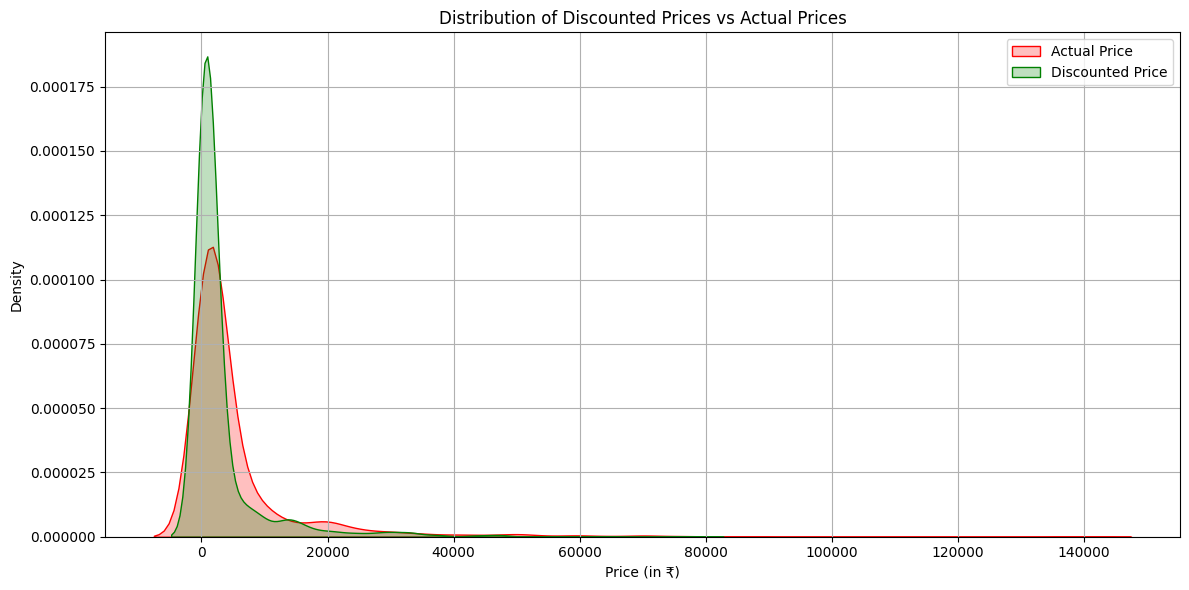

In [74]:
# 3.What is the distribution of discounted prices vs. actual prices?

df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

plt.figure(figsize=(12, 6))
sns.kdeplot(df['actual_price'], label='Actual Price', fill=True, color='red')
sns.kdeplot(df['discounted_price'], label='Discounted Price', fill=True, color='green')
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price (in ₹)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
# 4. How does the average discount percentage vary across categories?

df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
avg_discount_by_category = df.groupby('top_category')['discount_percentage'].mean().reset_index().sort_values(by='discount_percentage', ascending=False)

avg_discount_by_category

,top_category,discount_percentage
5,HomeImprovement,57.500000
1,Computers&Accessories,54.024283
3,Health&PersonalCare,53.000000
2,Electronics,50.828897
6,MusicalInstruments,46.000000
0,Car&Motorbike,42.000000
4,Home&Kitchen,40.120536
7,OfficeProducts,12.354839
8,Toys&Games,0.000000


In [79]:
5.What are the most popular product names?

if df['rating_count'].dtype == 'object':
    df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

popular_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False)
print(popular_products.head(10))

Object `names` not found.
                                          product_name  rating_count
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...      313832.0


In [81]:
# 6.What are the most popular product keywords

from collections import Counter
import pandas as pd

if df['rating_count'].dtype == 'object':
    df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

df = df.dropna(subset=['product_name', 'rating_count'])
keyword_counter = Counter()

for _, row in df.iterrows():
    words = str(row['product_name']).lower().split()
    for word in words:
        if len(word) > 2:
            keyword_counter[word] += row['rating_count']
popular_keywords = keyword_counter.most_common(20)
print(popular_keywords)

[('with', 15745052.0), ('for', 8243357.0), ('usb', 6916305.0), ('and', 5647968.0), ('cable', 5141148.0), ('boat', 4450099.0), ('(black)', 3980765.0), ('ear', 3938915.0), ('wired', 3466365.0), ('wireless', 3359449.0), ('charging', 3353879.0), ('fast', 3240477.0), ('black)', 2776820.0), ('bluetooth', 2681297.0), ('battery', 2667548.0), ('earphones', 2258507.0), ('smart', 2172286.0), ('ram,', 2166825.0), ('storage)', 2165744.0), ('adapter', 2051208.0)]


In [85]:
# 7.What are the most popular product reviews

if df['rating_count'].dtype == 'object':
    df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

df_sorted = df.sort_values(by='rating_count', ascending=False)
top_products = df_sorted.head(5)

review_columns = ['product_name', 'rating', 'rating_count', 'review_title', 'review_content', 'user_name']
print("Most Popular Products by Rating Count and Their Reviews:\n")
for index, row in top_products[review_columns].iterrows():
    print(f"Product: {row['product_name']}")
    print(f"Rating: {row['rating']}")
    print(f"Rating Count: {row['rating_count']}")
    print("-" * 80)

top_products[review_columns].to_csv('top_product_reviews.csv', index=False)
print("Top product reviews saved to 'top_product_reviews.csv'")

Most Popular Products by Rating Count and Their Reviews:

Product: AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
Rating: 4.4
Rating Count: 426973.0
--------------------------------------------------------------------------------
Product: Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black
Rating: 4.4
Rating Count: 426973.0
--------------------------------------------------------------------------------
Product: Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black
Rating: 4.4
Rating Count: 426973.0
--------------------------------------------------------------------------------
Product: AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
Rating: 4.4
Rating Count: 426972.0
--------------------------------------------------------------------------------
Product: boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)
Rating: 4.1
Rating Count: 363713.0
-------------------------------------------

In [80]:
# 8.What is the correlation between discounted_price and rating

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
correlation = df['discounted_price'].corr(df['rating'])
print(correlation)

0.12033741712288552


In [86]:
# 9. What are the Top 5 categories based on the highest rating

if df['rating_count'].dtype == 'object':
    df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)
category_ratings = df.groupby('category')['rating'].mean().reset_index()
top_categories = category_ratings.sort_values(by='rating', ascending=False).head(5)
print("Top 5 Categories by Highest Average Rating:\n")
for index, row in top_categories.iterrows():
    print(f"Category: {row['category']}")
    print(f"Average Rating: {row['rating']:.2f}")
    print("-" * 80)

Top 5 Categories by Highest Average Rating:

Category: Computers&Accessories|Tablets
Average Rating: 4.60
--------------------------------------------------------------------------------
Category: Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters
Average Rating: 4.50
--------------------------------------------------------------------------------
Category: Electronics|Cameras&Photography|Accessories|Film
Average Rating: 4.50
--------------------------------------------------------------------------------
Category: Computers&Accessories|Components|Memory
Average Rating: 4.50
--------------------------------------------------------------------------------
Category: Electronics|HomeAudio|MediaStreamingDevices|StreamingClients
Average Rating: 4.50
--------------------------------------------------------------------------------


In [ ]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis



In [88]:
                                #EDA-4
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

import pandas as pd
df = pd.read_csv('spotify.csv')
null_counts = df.isnull().sum()
print("Null values per column:\n", null_counts)
if null_counts.sum() > 0:
    print("\nFound null values. Dropping rows containing nulls...")
    df_no_nulls = df.dropna()
    print("Shape after dropping nulls:", df_no_nulls.shape)
else:
    print("\nNo null values found.")
    df_no_nulls = df.copy() 

num_duplicates = df_no_nulls.duplicated().sum()
if num_duplicates > 0:
    print("\nFound duplicate rows. Dropping duplicates...")
    df_cleaned = df_no_nulls.drop_duplicates(keep='first')
    print("Shape after dropping duplicates:", df_cleaned.shape)
else:
    print("\nNo duplicate rows found.")
    df_cleaned = df_no_nulls.copy() 


Null values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

No null values found.

Found duplicate rows. Dropping duplicates...
Shape after dropping duplicates: (413, 5)


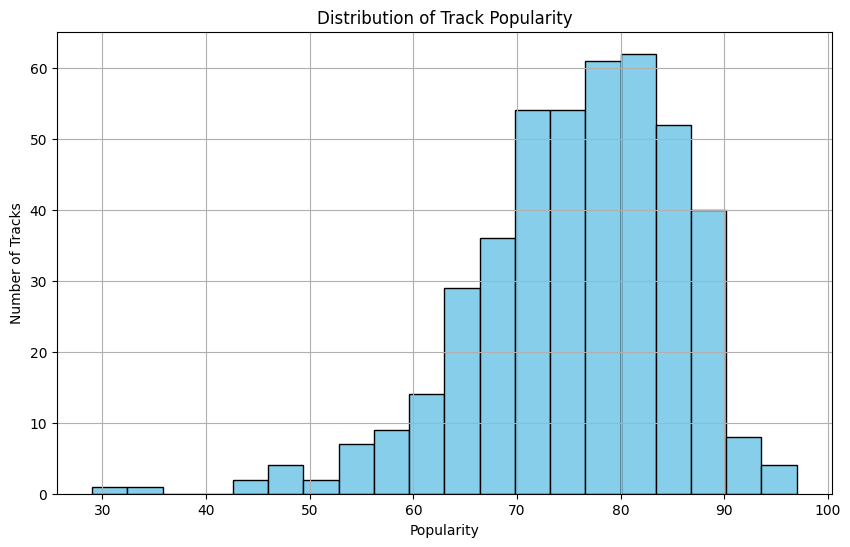

In [89]:
# 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

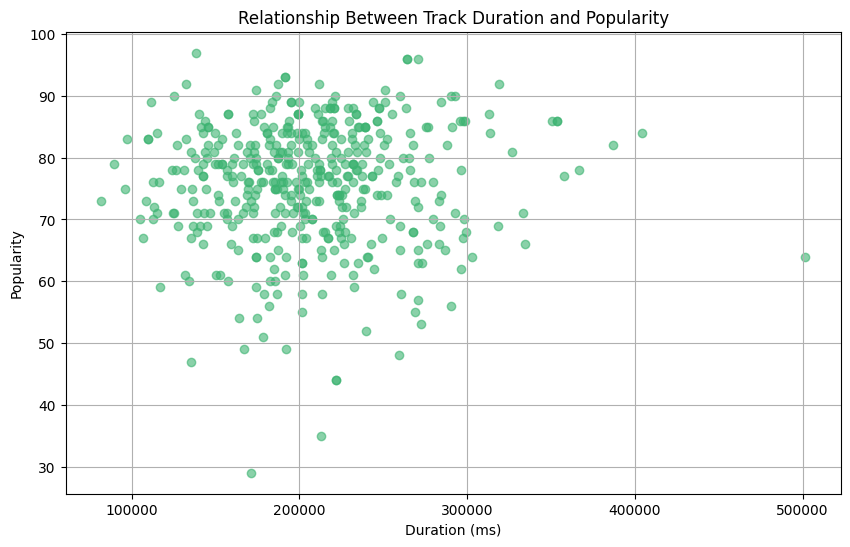

In [90]:
# 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (ms)'], df['Popularity'], alpha=0.6, color='mediumseagreen')
plt.title('Relationship Between Track Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

C:\Users\srava\AppData\Local\Temp\ipykernel_17764\3475207144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Artist', order=artist_counts.index[:10], palette='viridis')


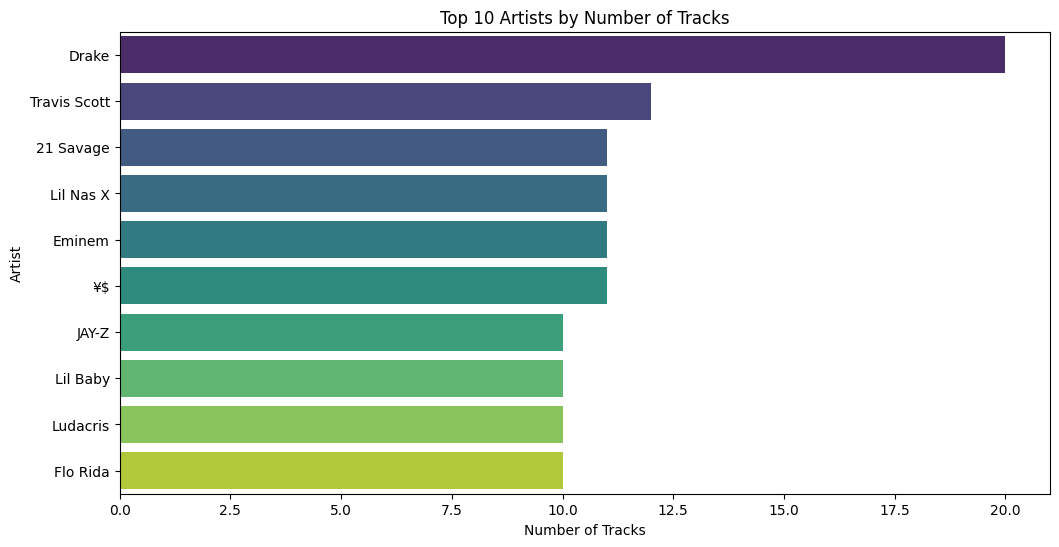

Top artist: Drake with 20 tracks


In [91]:
# 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?

artist_counts = df['Artist'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Artist', order=artist_counts.index[:10], palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

top_artist = artist_counts.idxmax()
top_count = artist_counts.max()
print(f"Top artist: {top_artist} with {top_count} tracks")

In [92]:
# 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
435  French Montana                Splash Brothers          44
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [93]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

top_5_artists = df['Artist'].value_counts().head(5).index
top_artists_df = df[df['Artist'].isin(top_5_artists)]
avg_popularity_per_artist = top_artists_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(avg_popularity_per_artist)

Artist
Travis Scott    87.000000
21 Savage       84.181818
Eminem          83.636364
Drake           83.500000
Lil Nas X       76.090909
Name: Popularity, dtype: float64


In [94]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

top_5_artists = df['Artist'].value_counts().head(5).index
top_artists_df = df[df['Artist'].isin(top_5_artists)]
most_popular_tracks = top_artists_df.loc[top_artists_df.groupby('Artist')['Popularity'].idxmax()]
print(most_popular_tracks[['Artist', 'Track Name', 'Popularity']])

           Artist                               Track Name  Popularity
70      21 Savage                                   redrum          96
0           Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80         Eminem                               Without Me          90
312     Lil Nas X                        THATS WHAT I WANT          81
30   Travis Scott               FE!N (feat. Playboi Carti)          93


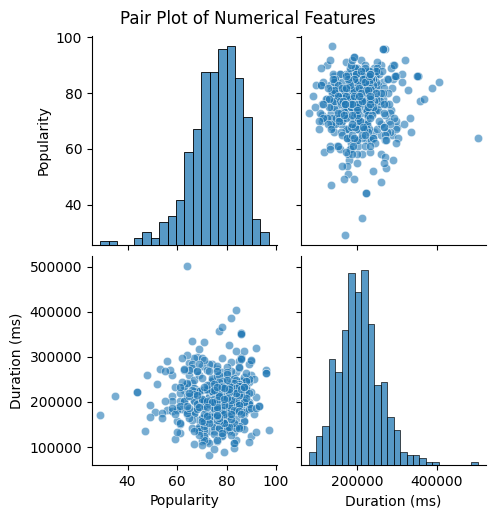

In [95]:
# 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot?

numerical_cols = ['Popularity', 'Duration (ms)']
sns.pairplot(df[numerical_cols], kind='scatter', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

C:\Users\srava\AppData\Local\Temp\ipykernel_17764\3891561959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='Set2')


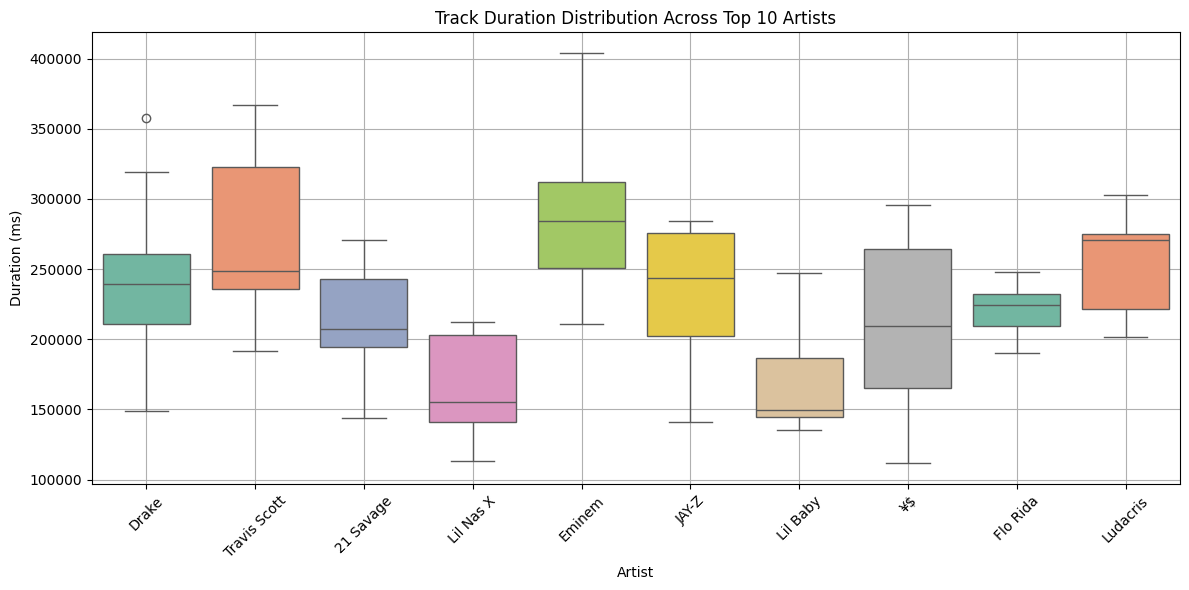

In [96]:
# 9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

top_10_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_10_artists)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='Set2')
plt.title('Track Duration Distribution Across Top 10 Artists')
plt.xticks(rotation=45)
plt.ylabel('Duration (ms)')
plt.xlabel('Artist')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\srava\AppData\Local\Temp\ipykernel_17764\829814726.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='Artist', y='Popularity', palette='coolwarm')


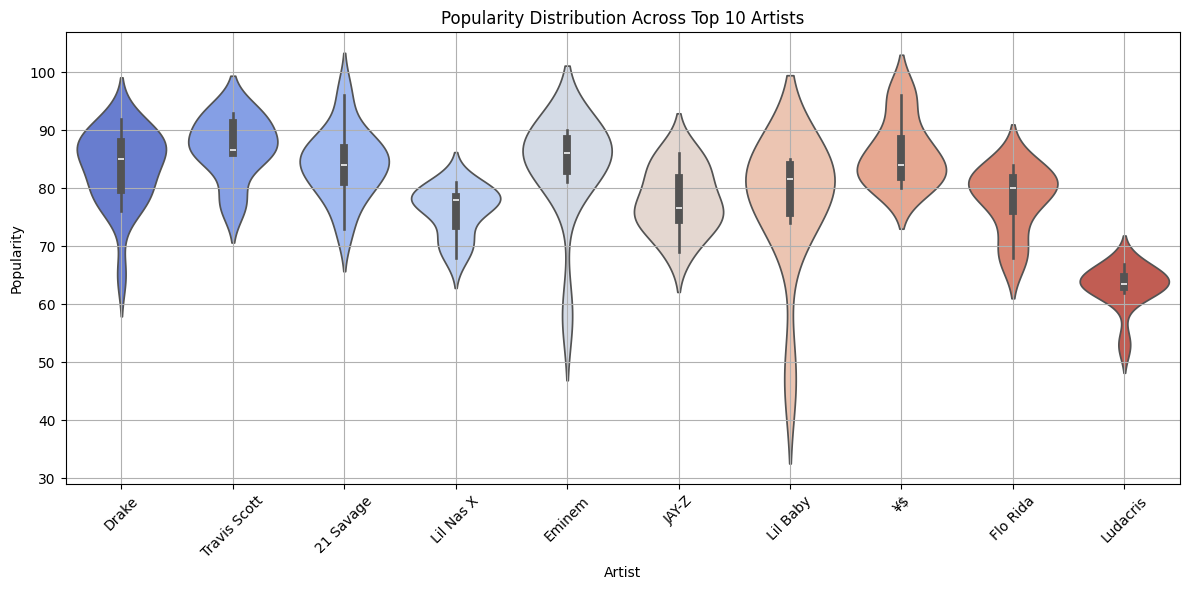

In [97]:
# 10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

top_10_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_10_artists)]
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', y='Popularity', palette='coolwarm')
plt.title('Popularity Distribution Across Top 10 Artists')
plt.xticks(rotation=45)
plt.ylabel('Popularity')
plt.xlabel('Artist')
plt.grid(True)
plt.tight_layout()
plt.show()